In [ ]:
import pandas as pd
import numpy as np
import os 
import pickle
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer() 
import nltk
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english')) 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
import string
from re import search

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir="/content/gdrive/MyDrive/IR Assignments/Assignment 3/p2p-Gnutella08.txt"

In [ ]:
#content = dir.read()
with open(dir, 'r',errors='ignore',encoding='latin-1') as file:
  content = file.read()

In [ ]:
#read_file = pd.read_csv(r'/content/gdrive/MyDrive/IR Assignments/Assignment 3/email-Eu-core (1).txt',delimiter = '\n')
#read_file.to_csv (r'/content/gdrive/MyDrive/IR Assignments/Assignment 3/Dataset_test.csv', index=None)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/IR Assignments/Assignment 3/BC_dataset.csv')

### **Number of Nodes**

In [ ]:
def No_Of_Nodes(df):
  l=[]
  for i in range(len(df)):
    for j in range(len(df.iloc[3])):
      l.append(df.iloc[i][j])
  l=set(l)
  return len(l)


In [ ]:
print("No of Nodes= ",No_Of_Nodes(df))


No of Nodes=  5881


### **Number Of Edges**

In [ ]:
def No_Of_Edges(df):
  df.drop_duplicates(inplace=True)
  return len(df)

In [ ]:
print("Number of Edges= ",No_Of_Edges(df))

Number of Edges=  35592


### **Average In Degree**

In [ ]:
def Average_In_Degree(df):
  In_Degree={}
  sum=0
  for i in range(len(df)):
    if df.iloc[i][1] in In_Degree:
      In_Degree[df.iloc[i][1]]=In_Degree[df.iloc[i][1]]+1
    else:
      In_Degree[df.iloc[i][1]]=1
    #print(len(In_Degree.keys()))
  for keys in In_Degree.keys():
    sum=sum+In_Degree[keys]
  return sum/No_Of_Nodes(df)




In [ ]:
print("Average In Degree= ",Average_In_Degree(df))

Average In Degree=  6.052031967352491


### **Average Out Degree**

In [ ]:
def Average_Out_Degree(df):
  Out_Degree={}
  sum=0
  for i in range(len(df)):
    if df.iloc[i][0] in Out_Degree:
      Out_Degree[df.iloc[i][0]]=Out_Degree[df.iloc[i][0]]+1
    else:
      Out_Degree[df.iloc[i][0]]=1
    #print(len(In_Degree.keys()))
  for keys in Out_Degree.keys():
    sum=sum+Out_Degree[keys]
  return sum/No_Of_Nodes(df)

In [ ]:
print("Average Out Degree= ",Average_Out_Degree(df))

Average Out Degree=  6.052031967352491


### **Node with Max In_Degree**

In [ ]:
def Max_In_Degree(df):
  In_Degree={}
  sum=0
  max_val=0
  for i in range(len(df)):
    if df.iloc[i][1] in In_Degree:
      In_Degree[df.iloc[i][1]]=In_Degree[df.iloc[i][1]]+1
    else:
      In_Degree[df.iloc[i][1]]=1
    #print(len(In_Degree.keys()))
  for keys in In_Degree.keys():
    if max_val < In_Degree[keys]:
      max_val=In_Degree[keys]
      max_node=keys
  return max_node




In [ ]:
print(Max_In_Degree(df))

35


### **Node with Max Out_Degree**

In [ ]:
def Max_Out_Degree(df):
  In_Degree={}
  sum=0
  max_val=0
  for i in range(len(df)):
    if df.iloc[i][0] in In_Degree:
      In_Degree[df.iloc[i][0]]=In_Degree[df.iloc[i][0]]+1
    else:
      In_Degree[df.iloc[i][0]]=1
    #print(len(In_Degree.keys()))
  for keys in In_Degree.keys():
    if max_val < In_Degree[keys]:
      max_val=In_Degree[keys]
      max_node=keys
  return max_node




In [ ]:
print(Max_Out_Degree(df))

35


### **Density of Graph**

In [ ]:
def Density(df):
  e=No_Of_Edges(df)
  n=No_Of_Nodes(df)
  return e/(n*(n-1))

In [ ]:
print("Density= ",Density(df))

Density=  0.0010292571373048454


### **Degree Distribution In Degree**

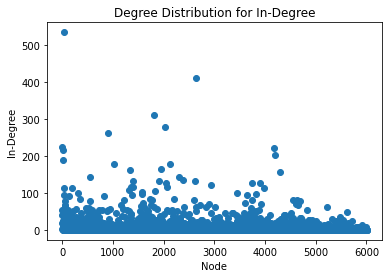

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
In_Degree={}
for i in range(len(df)):
  if df.iloc[i][1] in In_Degree:
    In_Degree[df.iloc[i][1]]=In_Degree[df.iloc[i][1]]+1
  else:
    In_Degree[df.iloc[i][1]]=1

plt.scatter(In_Degree.keys(), In_Degree.values())
plt.title("Degree Distribution for In-Degree")
plt.xlabel("Node")
plt.ylabel("In-Degree")
plt.show()

### **Degree Distribution Out Degree**

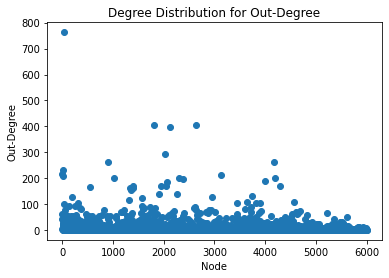

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Out_Degree={}
for i in range(len(df)):
  if df.iloc[i][0] in Out_Degree:
    Out_Degree[df.iloc[i][0]]=Out_Degree[df.iloc[i][0]]+1
  else:
    Out_Degree[df.iloc[i][0]]=1
plt.title("Degree Distribution for Out-Degree")
plt.xlabel("Node")
plt.ylabel("Out-Degree")
plt.scatter(Out_Degree.keys(), Out_Degree.values())
plt.show()

### **Adjacency Matrix**

In [ ]:
rows, cols = (6006, 6006)
arr = [[0 for i in range(cols)] for j in range(rows)]
for i in range(len(df)):
  arr[df.iloc[i][0]][df.iloc[i][1]]=1
#arr

### **Edge List**

In [ ]:
row=[]
edge_list=[]
for i in range(len(df)):
  row=[]
  row.append(df.iloc[i][0])
  row.append(df.iloc[i][1])
  edge_list.append(row)
#edge_list
  

### Local Clustering Coefficient

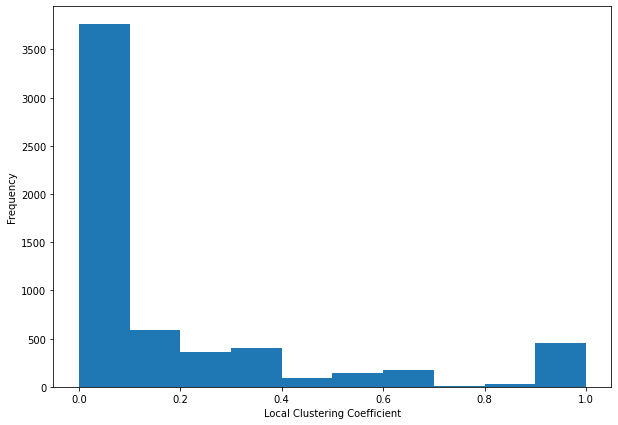

In [ ]:
LCC = []
for i in range(len(arr)):
  Neighbours = []
  for j in range(len(arr)):
    if arr[i][j] == 1 or arr[j][i] == 1:
      Neighbours.append(j)
  Actual_Links = 0
  if len(Neighbours)>0:
    for k in range(len(Neighbours)-1):
      for l in range(k+1,len(Neighbours)):
        if arr[Neighbours[k]][Neighbours[l]] == 1 or arr[Neighbours[l]][Neighbours[k]] == 1:
          Actual_Links += 1      
  Possible_Links = (len(Neighbours) * (len(Neighbours) - 1))/2

  if(Possible_Links == 0):
    LCC.append(0)
  else:
    LCC.append(Actual_Links/Possible_Links)
#Plotting Local Clustering Coefficient
fig, ax = plt.subplots(figsize =(10, 7))
#ax.set_title("Title")
ax.set_xlabel('Local Clustering Coefficient')
ax.set_ylabel('Frequency')
ax.hist(LCC)
plt.show()